In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import jit, njit, prange, set_num_threads

In [18]:

@njit(parallel=True)
def G_Force(m, Xi,Xj,Yi,Yj,Zi,Zj, G=1, r_soft=0.01):
    
    Xij = Xj - Xi
    Yij = Yj - Yi
    Zij = Zj - Zi
    
    R = np.sqrt(Xij**2+Yij**2+Zij**2)+r_soft
    F = G*m**2/R**3
    
    Fx = F*Xij
    Fy = F*Yij
    Fz = F*Zij
    
    Fx_total = np.sum(Fx, axis=1)
    Fy_total = np.sum(Fy, axis=1)
    Fz_total = np.sum(Fz, axis=1)
    
    return Fx_total, Fy_total, Fz_total


In [23]:
N = 10000
np.random.seed(111022544)
pos = np.random.randn(N,3)
np.random.seed(111022544)
vel = np.random.randn(N,3)

set_num_threads(8)
t0 = time.time()
Xi,Xj = np.meshgrid(pos[:,0], pos[:,0], indexing='ij')
Yi,Yj = np.meshgrid(pos[:,1], pos[:,1], indexing='ij')
Zi,Zj = np.meshgrid(pos[:,2], pos[:,2], indexing='ij')

Fx_total, Fy_total, Fz_total = G_Force(20/N,Xi,Xj,Yi,Yj,Zi,Zj)
t1 = time.time()
print(Fx_total) 
print(Fy_total) 
print(Fz_total) 
print('total time',t1-t0)

[-0.00197473 -0.00020445  0.00080867 ...  0.00257579  0.00479411
  0.00176343]
[-0.00584023 -0.00186839 -0.00576501 ...  0.00055151 -0.00316889
 -0.00666198]
[ 0.00384733 -0.00378934 -0.00546845 ...  0.00422944  0.00252434
 -0.00420789]
total time 2.6537187099456787


In [26]:
#some test

#mac outer
37.166444063186646 #N=10000 no jit
12.239506006240845 #N=10000 with jit
#12900k outer
8.607457876205444 #N=10000 no jit
8.322943449020386 #N=10000 with jit
#12900k meshgrid
7.489137887954712 #N=10000 no jit
6.85585355758667  #N=10000 with jit
#12900k meshgrid outside def
5.434570550918579 #N=10000 with jit first
#12900k meshgrid outside def
4.00260066986084 #N=10000 with njit(parallel=True)

4.00260066986084

In [ ]:
3.4647891521453857 #first
2.6609530448913574 #second

In [ ]:
N = 10000
m = 20/N
np.random.seed(111022544)
pos = np.random.randn(N,3)
np.random.seed(111022544)
vel = np.random.randn(N,3)
np.random.seed(111022544)
acc = np.random.randn(N,3)
np.random.seed(111022544)
acc2 = np.random.randn(N,3)

dt = 0.01
tmax = 10
T = np.linspace(0,tmax,int(tmax/dt)+1)

sol = np.zeros((N,3,len(T)))

t_start = time.time()

for i,t in enumerate(T):
    
    if i == 0:
        sol[:,:,i] = pos
        
    else:
        s = time.time()
        
        pos = sol[:,:,i-1]
        
        Xi,Xj = np.meshgrid(pos[:,0], pos[:,0], indexing='ij')
        Yi,Yj = np.meshgrid(pos[:,1], pos[:,1], indexing='ij')
        Zi,Zj = np.meshgrid(pos[:,2], pos[:,2], indexing='ij')
        
        Fx, Fy, Fz = G_Force(m,Xi,Xj,Yi,Yj,Zi,Zj)
        
        ax = Fx/m
        ay = Fy/m
        az = Fz/m
        
        acc[:,0] = ax
        acc[:,1] = ay
        acc[:,2] = az
        
        pos2 = pos + vel*dt
        vel2 = vel + acc*dt
        
        Xi,Xj = np.meshgrid(pos2[:,0], pos2[:,0], indexing='ij')
        Yi,Yj = np.meshgrid(pos2[:,1], pos2[:,1], indexing='ij')
        Zi,Zj = np.meshgrid(pos2[:,2], pos2[:,2], indexing='ij')
        
        Fx, Fy, Fz = G_Force(m,Xi,Xj,Yi,Yj,Zi,Zj)
        
        ax = Fx/m
        ay = Fy/m
        az = Fz/m
        
        acc2[:,0] = ax
        acc2[:,1] = ay
        acc2[:,2] = az
        
        next_pos = pos + dt/2*(vel + vel2)
        next_vel = vel + dt/2*(acc + acc2)
        
        sol[:,:,i] = next_pos
        vel        = next_vel
        
        e = time.time()
        print('time:',t,', spend:',e-s)

t_end = time.time()
print('total time',t_end-t_start)

time: 0.01 , spend: 6.061975002288818
time: 0.02 , spend: 6.251455545425415
time: 0.03 , spend: 6.266907215118408
time: 0.04 , spend: 6.243122339248657
time: 0.05 , spend: 6.275540828704834
time: 0.06 , spend: 6.276447057723999
time: 0.07 , spend: 6.268125772476196
time: 0.08 , spend: 6.345780849456787
time: 0.09 , spend: 6.271787405014038
time: 0.1 , spend: 6.3002190589904785
time: 0.11 , spend: 6.271855354309082
time: 0.12 , spend: 6.338150501251221
time: 0.13 , spend: 6.35288405418396
time: 0.14 , spend: 6.352966785430908
time: 0.15 , spend: 6.306520938873291
time: 0.16 , spend: 6.302487850189209
time: 0.17 , spend: 6.223535060882568
time: 0.18 , spend: 6.280619382858276
time: 0.19 , spend: 6.256187677383423
time: 0.2 , spend: 6.240160942077637
time: 0.21 , spend: 6.247687339782715
time: 0.22 , spend: 6.242374658584595
time: 0.23 , spend: 6.262340307235718
time: 0.24 , spend: 6.228551387786865
time: 0.25 , spend: 6.263273000717163
time: 0.26 , spend: 6.264149188995361
time: 0.27 , s

(-3.8629430798356217, 4.395285169624248, -3.192817011853181, 5.065411237606689)

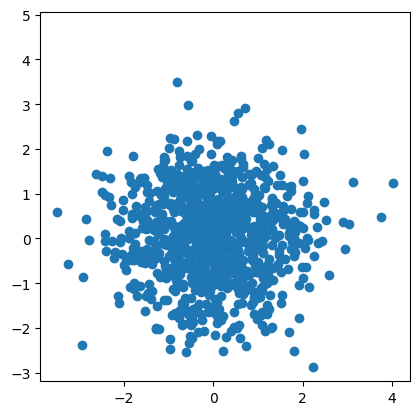

In [29]:
x = sol[:,0,0]
y = sol[:,1,0]

plt.scatter(x, y)
plt.axis('square')

(-9.989527369521417, 12.082870784016423, -8.44421965519301, 13.62817849834483)

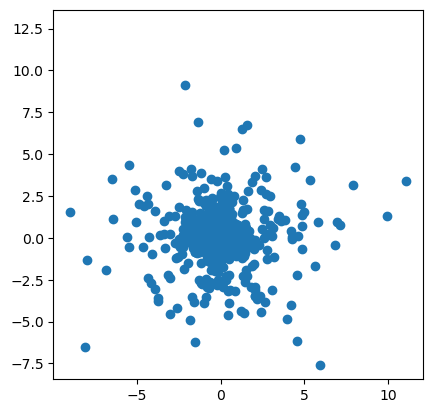

In [30]:
x = sol[:,0,200]
y = sol[:,1,200]

plt.scatter(x, y)
plt.axis('square')

(-14.895661251155307,
 18.978283108487187,
 -12.85211153602707,
 21.021832823615423)

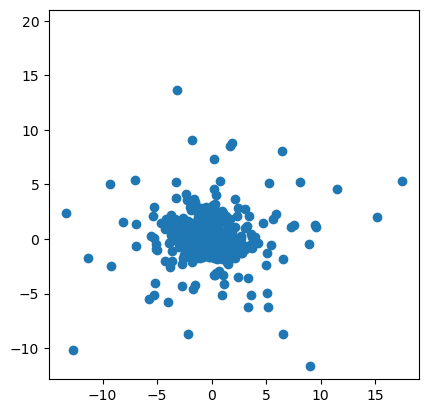

In [31]:
x = sol[:,0,400]
y = sol[:,1,400]

plt.scatter(x, y)
plt.axis('square')

(-19.3291407490276, 25.600416372201778, -16.949231626246988, 27.98032549498239)

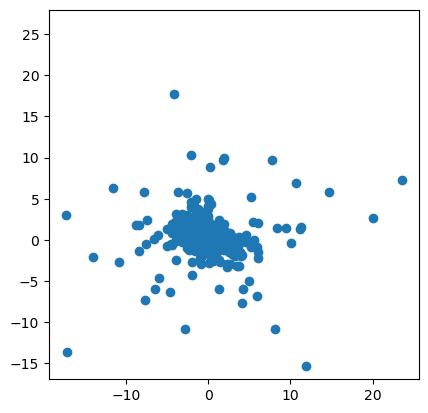

In [32]:
x = sol[:,0,600]
y = sol[:,1,600]

plt.scatter(x, y)
plt.axis('square')

(-24.037855575360698,
 32.10336972503352,
 -20.874329902703483,
 35.26689539769073)

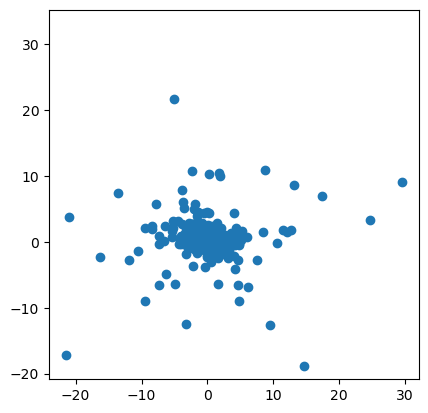

In [33]:
x = sol[:,0,800]
y = sol[:,1,800]

plt.scatter(x, y)
plt.axis('square')

(-28.82475979418195, 38.52717208665424, -24.68807763694221, 42.66385424389398)

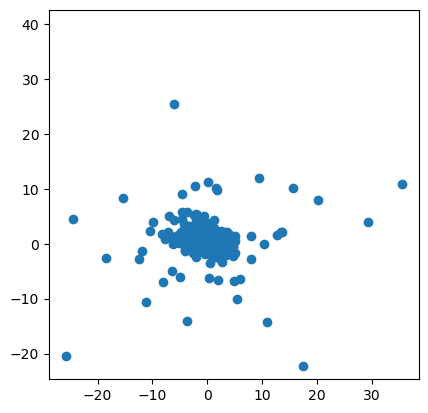

In [34]:
x = sol[:,0,1000]
y = sol[:,1,1000]

plt.scatter(x, y)
plt.axis('square')